In [108]:
#import library
import kagglehub
import os
import pathlib
import random
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

In [109]:
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

In [110]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-and-vegetable-image-recognition


# Sorting the Fruits into another folder

In [111]:
train_path=path+"/train"
test_path=path+"/test"
validation_path=path+'/validation'

In [112]:
fruit=["Banana", "Apple", "Pear", "Grapes", "Orange",
    "Kiwi", "Watermelon", "Pomegranate", "Pineapple", "Mango"]

In [113]:
fruit_names=[fruit.lower() for fruit in fruit]

In [114]:
fruit_names

['banana',
 'apple',
 'pear',
 'grapes',
 'orange',
 'kiwi',
 'watermelon',
 'pomegranate',
 'pineapple',
 'mango']

## Finding the number of classes

In [115]:
number_of_classes=len(os.listdir(path+"/train"))
number_of_classes

36

## Finding the class names

In [116]:
data_dir=pathlib.Path(path+"/train")

In [117]:
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

In [123]:
class_names

array(['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage',
       'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn',
       'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno',
       'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika',
       'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish',
       'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato',
       'turnip', 'watermelon'], dtype='<U13')

## Viewing a random image

In [127]:
def view_random_image(target_dir,target_class=random.choice(class_names)):
  target_folder=target_dir+"/"+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=cv2.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape {img.shape}")

In [128]:
train_path

'/kaggle/input/fruit-and-vegetable-image-recognition/train'

Image shape (900, 1200, 3)


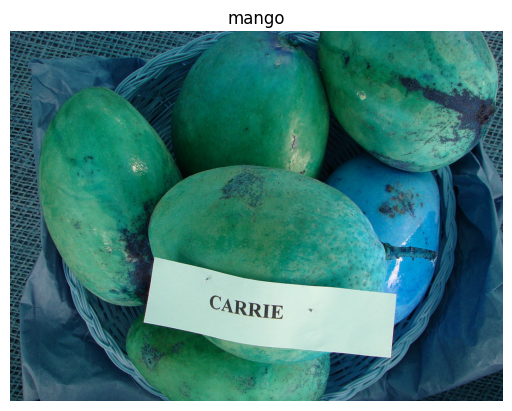

In [133]:
view_random_image(target_dir=train_path,target_class=random.choice(class_names))

## Loading the images

In [187]:
img_width, img_height = 300, 300

In [188]:
train_datagen=ImageDataGenerator()
valid_datagen=ImageDataGenerator()

In [189]:
train_dir=train_path

In [190]:
test_dir=test_path

In [192]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             class_mode="categorical",
                                             seed=13,
                                             target_size=(img_width, img_height))

Found 3115 images belonging to 36 classes.


In [193]:
test_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            class_mode='categorical',
                                            target_size=(img_width, img_height),
                                            seed=13)

Found 359 images belonging to 36 classes.


In [176]:
num_class=train_data.num_classes

In [177]:
num_class

36

In [179]:
model1=models.Sequential()

# First Hidden Layers
model1.add(layers.Conv2D(64, (3, 3),activation='relu',input_shape=(255, 225, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

#Second hidden layers
model1.add(layers.Conv2D(128,(3, 3),activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

#Third Hidden Layers
model1.add(layers.Conv2D(64,(3,3),activation="relu"))
model1.add(layers.MaxPooling2D((2,2)))

#Fourth Hidden Layers
model1.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model1.add(layers.MaxPooling2D((2,2)))

# Flatten and add dense layers

model1.add(layers.Flatten())
model1.add(layers.Dense(64,activation='relu'))
model1.add(Dropout(0.01))
model1.add(layers.Dense(num_class,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
model1.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 253, 223, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 126, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 124, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 62, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 60, 52, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 30, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 30, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 15, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 12480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │       798,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 987,492 (3.77 MB)

 Trainable params: 987,492 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

In [182]:
model1.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [183]:
model1.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 12480, but received input with shape (None, 14400)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 255, 255, 3), dtype=float32)
  • training=True
  • mask=None

### "I'm currently addressing an issue related to the shape configuration of the flatten layers.I'm working on resolving a shape mismatch issue in the flatten layers of my model.